# Class Priotization for all of the classes
We will make a model:Mapping configurations to Coverage for each class
We split it into test and training set and do it using 10-fold cross validation
Then based on the test set we can see which feature is more important for the prediction of each class
Therefore for each class, we will have a number indicating the importance of each class. (importances vector)

In [14]:
# import all data for all classes
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns_colors = sns.color_palette('colorblind')


In [80]:
# read the data

dataset = pd.read_excel('AllResults.xlsx', sheet_name='Data')
dataset.columns=dataset.loc[0]
dataset = dataset.drop(0)
dataset = dataset.loc[:,'Class Count':'Tuning Gain']
dataset = dataset.drop(63)
dataset.isnull().sum().sum()
dataset.tail()

,Class Count,Abstract Class Count,Ca,Ce,A,I,D,V,cbo,wmc,...,try,void,volatile,while,Vocabulary,Program Length,Volume,Difficulty,Effort,Tuning Gain
246,4,0,1,2,0,0.67,0.33,1,1,12,...,0,2,0,0,58,270,1581.65,13.4118,21212.8,0
247,4,0,1,2,0,0.67,0.33,1,2,12,...,0,2,0,0,61,239,1417.45,15.0943,21395.4,0
248,12,3,2,11,0.25,0.85,0.1,1,6,11,...,0,1,0,0,101,371,2470.2,13.8261,34153.2,7.07187
249,1,0,0,7,0,1,0,1,9,21,...,0,10,0,0,60,184,1086.87,0,0,0
250,13,3,4,11,0.23,0.73,0.04,1,2,9,...,0,3,0,0,47,121,672.105,2.5333,1702.67,0


In [81]:
# Building Models, Random Forest Regression, Linear Regression, Feature Selection
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statistics 

scaler = StandardScaler()
scaler2 = MinMaxScaler() 
lb_make = LabelEncoder()

Y = dataset.pop('Tuning Gain')
X = dataset.iloc[:, 0:len(dataset.columns)]
X_scaled = scaler.fit_transform(X)
number_of_features = [2,5,10,20,40]
top_features = [[] for item in range(2+len(number_of_features))]
sum_gain = [[] for item in range(4+len(number_of_features))]
preds = [[] for item in range(4+len(number_of_features))]



rs = ShuffleSplit(n_splits=100, test_size=.4, random_state=0)
for train_index, test_index in rs.split(X_scaled):
    X_train = np.array(X)[train_index]
    y_train = np.array(Y)[train_index]
    X_test = np.array(X)[test_index]
    y_test = np.array(Y)[test_index]

    order = np.argsort(y_test)[::-1]
    sum_gain[0].append(np.cumsum(np.array(y_test)[order]))
    preds[0].append(y_test)

    
    random_order = np.random.shuffle(np.arange(100))
    sum_gain[2].append(np.cumsum(np.array(y_test)[random_order]))

    regr = RandomForestRegressor(n_estimators=200,max_depth=5, random_state=0)
    regr = regr.fit(X_train, y_train)
    top_features[0].append(regr.feature_importances_)
    y_pred = regr.predict(X_test)
    order = np.argsort(y_pred)[::-1]
    print(np.array(test_index)[order])
    sum_gain[1].append(np.cumsum(np.array(y_test)[order]))
    preds[1].append(y_pred)

    estimator = LinearRegression().fit(X_train, y_train)
    y_pred2 = estimator.predict(X_test)
    top_features[1].append(estimator.coef_)
    order2 = np.argsort(y_pred2)[::-1]
    sum_gain[3].append(np.cumsum(np.array(y_test)[order2]))
    preds[3].append(y_pred2)

    
    for i in range(len(number_of_features)):
        regr1 = RandomForestRegressor(n_estimators=200,max_depth=5, random_state=0)    
        rfe1 = RFE(regr1, n_features_to_select=number_of_features[i], step=10)
        rfe1 = rfe1.fit(X_train, y_train)
        y_pred3 = rfe1.predict(X_test)
        top_features[2+i].append(rfe1.support_)
        order3 = np.argsort(y_pred3)[::-1]
        sum_gain[4+i].append(np.cumsum(np.array(y_test)[order3]))
        preds[4+i].append(y_pred3)


[  3  59  37  18  13  71 218  52  61  56 173  40  60  63 149  16  30   8
 236  96 242  66  64 203 224  55 222  45 214 223  97 106 150 202 130  15
 107 110  92  24 229   7   5 184 194 189 228  19  22  83  33  26 239 145
 180 109 108 221 168  44 226 178 176 116 159 248   4 129 122 111 126 124
 179  90 139 209 201 182 213 155  73 136  76 161 101 125 160 146 205 135
 162  89 186 207  74  75 156 118  12 187]
[  3  54  21  56  37 218  57 217 170  60  40  71  31  62  27  42  47   9
  86  96  46  95 244 134  15 223 214 227 110  50 144 213 130 215 132 180
 142  19 202  23 148 143 188 194 184 166 137 195 196   6 248   1  12 169
 109 210 102 108  78 155 186 178 157  11 154  99 228 205 153  75  77 104
 207  10 201 156 118  82  76 191  79  90  98 113 221 125 206 100 185 220
 211 179 151 199 119 212 152 208 235 131]
[ 13  36  18  37   8  52  31 218  56  40  68  30  20   9  16  29  60 230
 246  50  64  95 224 177  43 103 240 121  86 243 214  41  55  27 144 130
 237 106  48 110 193 247  19 142  14  99

[ 36  67  13  18   8  71  60  52 218  65  28 216 240 103  68  31  40  32
  30  16 177  47  50 230 246  42 223  43 233 214 238 229 232  38 107 225
   7 123 144  15 142  53  14  92   0  23 109 116 148 140 147 143  99 129
   1  83 119 178 188 160 162 228  80  76 167 172 124 153  78 187 179 204
 164 158 133 104 113 175 151 161 115 126 108 163  73 105  90  39 231  82
 174 125 209 211  98 186 205  85 156 135]
[216 244 217 181  67  61  28  60 246  56 203  63 173  66  31 149  62  35
  42  43 224 230 247  47 232  29  16  20  38 107 229 198 106  41 243  86
  15 234 123 171 219  96 134 177  50 215   7  24  23  14 184 110  92  46
 142  26 214  51 116 130 115  48   4 190 180   1  39   6 122 182 183 178
 168  93 186 136 206  83  74 151 146 164 141  80 195 200 172  99  73 208
 138  78  77 108 192 165 176 159 205  85]
[ 59  13 181  21  67  28  57  69  60 242 236 246 149  62  43 173  45  16
  95 198  30  41 112 177 130 142 114  46 107  19  20 238 219 106  55  48
  14 167   0 222 131 110 215  15  44 144

[ 58  13  34  52  37 149  36  20  40 247  71  19 127  60 107  38 181  47
 246 203 128  45 230  43  30  32  16 219  42 224 177 229  50   9 240  99
 222  48 130 234 198 110 106 226  49 228 231 202 239 176 194  94  10 117
   6 164 131 109  77 113  44   0  26  39 140 147 174 124 189  75 159 126
 172 118  90 163 125   2 119 212  80  76  93 186 101 104  91 165 248  83
 207 221  78 208  79 138  11  84 158 161]
[  3  59  13  36  18 216  34  71  56  69 244 245  52  70  47 173 103  65
  30  45  35  64  66 203 193 149  16  43  96  95 219  29 223 232 177 222
 238  32  50  53 247  42  51  48 243 142 214 230 215 132 202  94 167 166
 169 137 248 235  26 213   2 148 147 143 157 124 100 138 172   4 191 155
  80 220 118  79 185 160 108 165 162  72 159 208 133  84 153 231 146  91
 207 136  83 115  75  99  74 158 189 186]
[ 58  54  36  67  61 217 181  52  60 103 128  86 149 237 214 144 236 240
 222 134  16  95  30  27  96  20  32 247 121  46 114 127 106 227 229  50
  15 132 234 123  24 235 213   0 248  23

[ 13   3  54  36  21   8  61 216 181  56 203  68  34  40  63 193 149 240
 244  69  42 173  64  96  17  35  66 114  46 243   7 229 225 112 188  97
 230   5  23  92 132 106  43 144 234   0 142   6 151 152  94  26 248 190
 174 196 197 226  25   2  83 100 124  44  12 180 127 195 161 221 108 145
  82 120 187 168  79  98 139  80 118 113 204 211 140 162 153  81 160 207
 206 199  73 201 105 165 141 164  78 205]
[ 59 203  28  56  57  37  70  68 128 170 246  47 149 242  35  45  53  31
 173  43 230 177 134 219  19  38 232 222   9 238 127 215  32 132 123 239
   7 111   5  49 234  23  22 225 131 148 147  26 144  39   0  83 166 169
 164 194 202 113 119  25  85 120  98  84  88 153  91  89  90 129 136 135
 115  94 152 159 124  78 201  73 206 192 168 163 141 200 204 104 160 186
 221 185  72 209  79 182  75 195 210 162]
[203  70  60  34  36 103 218 216  37  28  40 242  64 246 181 193  27  16
  62 230 219 142  17  20  95  43  24  30  19  50   9 245  53  49  38 224
  10 130 225 243  46 110  55  97 134  15

[216 245  36 181  67  18  28 203  56  65  57  70 242  68  62  66  29  31
 246 233 222 173  30 230  43  95  55 229 112  46 247  15 243  51 214 171
 114 215 234 238 107  24 110 132  19  26 248 117  33 241  49 148 147  97
 180 197 212 131 228 199 189 195 196 191  89 165  74  39 159 162 157 113
  75 133  11 118 151 105 164 108 115 141 139 161 146 155  72 120 102 163
 210  82  79 158 221 125 183 178   6 116]
[ 58   3  69 217  54  21 245 244  65 236  71  36 246  63  37  47  64  62
  43 224  30  86  27 230  96 238 227   9   7  48 117 142 130 239  15 226
  51 110  38 150 132 114 112  46  94   6 143 140  14 198  23  33 184 188
 199 122 197 206  10  39 178  25   4  12  99 157 228 158 160 163  98   2
 161  78  76  85 172 156 126 120 201 135  79 139  91  80 137 152 118 104
  72 101 119 204 189  74 146  75  77 210]
[ 13  36  67 216  18  61  56 128  68  63  34 149 246 240  70 173  16  27
  29 233 230  35  55  46  95  15 144  41  38 150   5  92  99  97 127 234
  24 213  94  23 215  33   1 166 142 191

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(7, 100, 105)


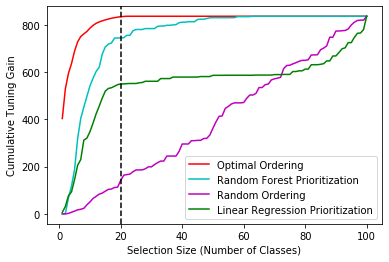

In [83]:
# Plot figure Rq1.1
M = np.array(sum_gain)
F = np.array(top_features)
print(F.shape)


sum_median = []
for m in range(4+len(number_of_features)):
    new =[]
    for n in range(100): # number of classes
        new.append(statistics.median(M[m,:,n]))
    sum_median.append(new)


    

plot1 = plt.figure(1)
plt.xlabel("Selection Size (Number of Classes)")
plt.ylabel("Cumulative Tuning Gain")
plt.plot(range(1,101), sum_median[0], 'r',label='Optimal Ordering') # plotting t, a separately 
plt.plot(range(1,101), sum_median[1], 'c',label='Random Forest Prioritization') # plotting t, a separately 
plt.plot(range(1,101), sum_median[2], 'm',label='Random Ordering') # plotting t, a separately 
plt.plot(range(1,101), sum_median[3], 'g',label='Linear Regression Prioritization') # plotting t, a separately 
plt.legend()
plt.axvline(x=20,color='k', linestyle='dashed')

plt.savefig('RQ112.eps', format='eps')


plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


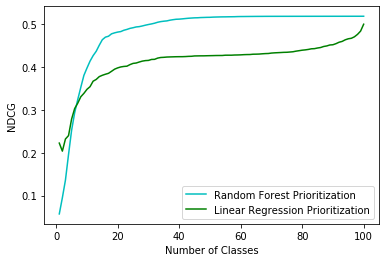

In [52]:
# Normalized Discounted Cumulative Gain (NDCG)
from sklearn import metrics
PPP = np.array(preds)

true_relevance = np.asarray(PPP[0])

# we predict scores for the answers
metrics.ndcg_score(true_relevance, scores,k=20)
ndcgs = []
for m in [1,3]:
    scores = np.asarray(PPP[m])
    new =[]
    for n in range(1,101): # number of classes
        new.append(metrics.ndcg_score(true_relevance, scores,k=n))
    ndcgs.append(new)
    
plt.figure()
plt.xlabel("Number of Classes")
plt.ylabel("NDCG")
plt.plot(range(1,101), ndcgs[0], 'c',label='Random Forest Prioritization') # plotting t, a separately 
plt.plot(range(1,101), ndcgs[1], 'g',label='Linear Regression Prioritization') # plotting t, a separately 



plt.legend()
plt.savefig('NDCG.eps', format='eps')

plt.show()

In [55]:
# AUC Calculation
from sklearn import metrics
best = metrics.auc(range(1,101), sum_median[0])
cyan = metrics.auc(range(1,101), sum_median[1])/best
print("RFR Ratio: %.3f" % cyan)
magneta = metrics.auc(range(1,101), sum_median[2])/best
print("Random Ratio: %.3f" % magneta)
magneta2 = metrics.auc(range(1,101), sum_median[3])/best
print("Linear AUC Ratio: %.3f" % magneta2)
magneta3 = metrics.auc(range(1,101), sum_median[4])/best
print("RFR 2f AUC Ratio: %.3f" % magneta3)
magneta4 = metrics.auc(range(1,101), sum_median[5])/best
print("RFR 5f AUC Ratio: %.3f" % magneta4)
magneta5 = metrics.auc(range(1,101), sum_median[6])/best
print("RFR 10f AUC Ratio: %.3f" % magneta5)
magneta6 = metrics.auc(range(1,101), sum_median[7])/best
print("RFR 20f AUC Ratio: %.3f" % magneta6)
magneta7 = metrics.auc(range(1,101), sum_median[8])/best
print("RFR 40f AUC Ratio: %.3f" % magneta7)



RFR Ratio: 0.921
Random Ratio: 0.483
Linear AUC Ratio: 0.677
RFR 2f AUC Ratio: 0.845
RFR 5f AUC Ratio: 0.894
RFR 10f AUC Ratio: 0.904
RFR 20f AUC Ratio: 0.918
RFR 40f AUC Ratio: 0.920


In [84]:
# normalized cumulative gain
best = sum_median[0][20]
cyan = sum_median[1][20]/best
print("RFR Ratio: %.3f" % cyan)
magneta = sum_median[2][20]/best
print("Random Ratio: %.3f" % magneta)
magneta2 = sum_median[3][20]/best
print("Linear AUC Ratio: %.3f" % magneta2)
# nCG

for i in range(9):
            print("%.3f" % (sum_median[i][20]/best))

RFR Ratio: 0.892
Random Ratio: 0.195
Linear AUC Ratio: 0.657
1.000
0.892
0.195
0.657
0.747
0.813
0.848
0.875
0.891


In [84]:
# Most frequent Features
for index in range(2,7):
    frequency = F[index].sum(axis=0)
    order = np.argsort(frequency)[::-1]
    print(np.array(dataset.columns)[order][:number_of_features[index-2]])

['rfc' 'else']
['else' 'rfc' 'Abstract Class Count' 'Difficulty' 'comparisonsQty']
['Difficulty' 'rfc' 'Abstract Class Count' 'else' 'anonymousClassesQty'
 'comparisonsQty' 'Effort' 'class' 'do' 'stringLiteralsQty']
['Abstract Class Count' 'rfc' 'Difficulty' 'else' 'comparisonsQty'
 'Effort' 'anonymousClassesQty' 'variablesQty' 'mathOperationsQty'
 'stringLiteralsQty' 'class' 'parenthesizedExpsQty' 'Vocabulary'
 'assignmentsQty' 'do' 'if' 'maxNestedBlocks' 'throws' 'import'
 'numbersQty']
['rfc' 'Effort' 'else' 'Abstract Class Count' 'variablesQty'
 'mathOperationsQty' 'Difficulty' 'comparisonsQty' 'anonymousClassesQty'
 'parenthesizedExpsQty' 'stringLiteralsQty' 'assignmentsQty' 'if'
 'Vocabulary' 'nosi' 'maxNestedBlocks' 'numbersQty' 'Ce' 'Volume' 'class'
 'loc' 'wmc' 'interface' nan 'do' 'import' 'void' 'Program Length'
 'instanceof' 'throws' 'static' 'break' 'float' 'case' 'byte' 'double'
 'switch' 'new' 'short' 'totalMethods']


In [49]:
# AUC up to 20
from sklearn import metrics
sum_median = np.array(sum_median)
threshold = 20
best = metrics.auc(range(1,threshold), sum_median[0,0:threshold-1])
print(best)
cyan = metrics.auc(range(1,threshold), sum_median[1,0:threshold-1])/best
print("RFR Ratio: %.3f" % cyan)
magneta = metrics.auc(range(1,threshold), sum_median[2,0:threshold-1])/best
print("Random Ratio: %.3f" % magneta)
magneta2 = metrics.auc(range(1,threshold), sum_median[3,0:threshold-1])/best
print("Linear AUC Ratio: %.3f" % magneta2)
magneta3 = metrics.auc(range(1,threshold), sum_median[4,0:threshold-1])/best
print("RFR 2f AUC Ratio: %.3f" % magneta3)
magneta4 = metrics.auc(range(1,threshold), sum_median[5,0:threshold-1])/best
print("RFR 5f AUC Ratio: %.3f" % magneta4)
magneta5 = metrics.auc(range(1,threshold), sum_median[6,0:threshold-1])/best
print("RFR 10f AUC Ratio: %.3f" % magneta5)
magneta6 = metrics.auc(range(1,threshold), sum_median[7,0:threshold-1])/best
print("RFR 20f AUC Ratio: %.3f" % magneta6)
magneta7 = metrics.auc(range(1,threshold), sum_median[8,0:threshold-1])/best
print("RFR 40f AUC Ratio: %.3f" % magneta7)


13397.60587310253
RFR Ratio: 0.621
Random Ratio: 0.071
Linear AUC Ratio: 0.442
RFR 2f AUC Ratio: 0.409
RFR 5f AUC Ratio: 0.500
RFR 10f AUC Ratio: 0.535
RFR 20f AUC Ratio: 0.593
RFR 40f AUC Ratio: 0.620


In [272]:
# test argsort
pred = [5,10,6,3,2,11,8,9]
real = [4,7,8,5,1,10,12,7]
print(np.argsort(pred))
print(np.argsort(pred)[::-1])
print(np.array(pred)[np.argsort(pred)])
print(np.array(pred)[np.argsort(pred)[::-1]])
print(np.array(real)[np.argsort(pred)])
print(np.array(real)[np.argsort(pred)[::-1]])
   
    
order = np.argsort(pred)[::-1]
new_order = []
i=j=0
for n in range(len(pred)): 
    if (n+1)%5!=0:
        new_order.append(order[i])
        i=i+1
    else:
        new_order.append(order[::-1][j])
        j=j+1
     
print(new_order)

[4 3 0 2 6 7 1 5]
[5 1 7 6 2 0 3 4]
[ 2  3  5  6  8  9 10 11]
[11 10  9  8  6  5  3  2]
[ 1  5  4  8 12  7  7 10]
[10  7  7 12  8  4  5  1]
[5, 1, 7, 6, 4, 2, 0, 3]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


2390.25
2382.00
2399.25
2398.75
2410.75
2378.50


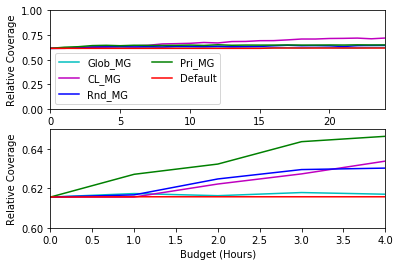

0.616
0.617
0.634
0.630
0.646
0.616


In [37]:
# read the files for each hour
# get the median for each method
# plot relative coverage median for each hour
import csv
import statistics

median_of_relative_coverages = [[] for item in range(6)]
median_of_branch_coverages = [[] for item in range(6)]




for hour in range(1,25):
    filename = "/Users/shayan/Downloads/IdeaProjects/test/newtune/newtune" + str(hour) + ".csv"
    with open(filename, newline='') as csvfile:
        spamreader = list(csv.reader(csvfile, delimiter=',', quotechar='|'))
        for i in range(6):
            median_of_branch_coverages[i].append(statistics.median(map(float,[row[i] for row in spamreader])))
for i in range(6):
            median_of_branch_coverages[i].insert(0,median_of_branch_coverages[0][0])
        
for i in range(6):
            print("%.2f" % median_of_branch_coverages[i][4])       
        
        
    
        
        

for hour in range(1,25):
    filename = "/Users/shayan/Downloads/IdeaProjects/test/relcov/tune" + str(hour) + ".csv"
    with open(filename, newline='') as csvfile:
        spamreader = list(csv.reader(csvfile, delimiter=',', quotechar='|'))
        for i in range(6):
            median_of_relative_coverages[i].append(statistics.median(map(float,[row[i] for row in spamreader])))
for i in range(6):
            median_of_relative_coverages[i].insert(0,median_of_relative_coverages[0][0])
plt.figure()
plt.subplot(211)
plt.xlabel("Budget (Hours)")
plt.ylabel("Relative Coverage")
# plt.plot(range(25), median_of_relative_coverages[0], 'r',label='Default') # plotting t, a separately 
plt.plot(range(25), median_of_relative_coverages[1], 'c',label='Glob_MG') # plotting t, a separately 
plt.plot(range(25), median_of_relative_coverages[2], 'm',label='CL_MG') # plotting t, a separately
plt.plot(range(25), median_of_relative_coverages[3], 'b',label='Rnd_MG') # plotting t, a separately 
plt.plot(range(25), median_of_relative_coverages[4], 'g',label='Pri_MG') # plotting t, a separately 
plt.plot(range(25), median_of_relative_coverages[5], 'r',label='Default') # plotting t, a separately 
axes = plt.gca()
axes.set_xlim([0,24])
axes.set_ylim([0,1])
plt.legend(ncol=2)

plt.subplot(212)
plt.xlabel("Budget (Hours)")
plt.ylabel("Relative Coverage")
# plt.plot(range(25), median_of_relative_coverages[0], 'r',label='Default') # plotting t, a separately 
plt.plot(range(25), median_of_relative_coverages[1], 'c',label='Glob_MG') # plotting t, a separately 
plt.plot(range(25), median_of_relative_coverages[2], 'm',label='CL_MG') # plotting t, a separately
plt.plot(range(25), median_of_relative_coverages[3], 'b',label='Rnd_MG') # plotting t, a separately 
plt.plot(range(25), median_of_relative_coverages[4], 'g',label='Pri_MG') # plotting t, a separately 
plt.plot(range(25), median_of_relative_coverages[5], 'r',label='Default') # plotting t, a separately 
axes = plt.gca()
axes.set_xlim([0,4])
axes.set_ylim([0.6,0.65])
plt.savefig('RQ22.eps', format='eps')

plt.show()

for i in range(6):
            print("%.3f" % median_of_relative_coverages[i][4])

        

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


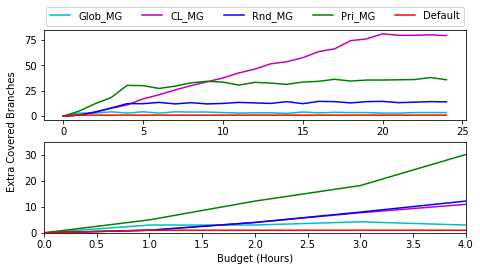

In [109]:



# read the files for each hour
# get the median for each method (classlevel global)
import csv
import statistics

improvement_coverages = [[] for item in range(5)]




for hour in range(1,25):
    filename = "/Users/shayan/Downloads/IdeaProjects/test/newtune/newtune" + str(hour) + ".csv"
    with open(filename, newline='') as csvfile:
        spamreader = list(csv.reader(csvfile, delimiter=',', quotechar='|'))
#         for row in spamreader:
#                 print(row)
#                 print(row[0])
#         print(spamreader)
#         print(hour)
        for i in range(5):
            dummy = []
            for row in spamreader:
#                 print(row)
                n = float(row[i+1])-float(row[0])
                dummy.append(n)
            improvement_coverages[i].append(statistics.median(dummy))
for i in range(5):
            improvement_coverages[i].insert(0,0)
        
        
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_xlabel("Budget (Hours)")
ax.set_ylabel("Extra Covered Branches")  
        

# plt.xlabel("Budget (Hours)")
# plt.ylabel("Extra Covered Branches")
# plt.plot(range(25), median_of_relative_coverages[0], 'r',label='Default') # plotting t, a separately 
ax1.plot(range(25), improvement_coverages[0], 'c',label='Glob_MG') # plotting t, a separately 
ax1.plot(range(25), improvement_coverages[1], 'm',label='CL_MG') # plotting t, a separately
ax1.plot(range(25), improvement_coverages[2], 'b',label='Rnd_MG') # plotting t, a separately 
ax1.plot(range(25), improvement_coverages[3], 'g',label='Pri_MG') # plotting t, a separately 
ax1.plot(range(25), improvement_coverages[4], 'r',label='Default') # plotting t, a separately 
axes1 = plt.gca()
axes1.set_xlim([0,24])
# axes.set_ylim([0,1])
# ax1.legend(ncol=3,fancybox=True, framealpha=0.5)
ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=5,mode='expand', borderaxespad=0.2)
# plt.subplot(212)

# plt.plot(range(25), median_of_relative_coverages[0], 'r',label='Default') # plotting t, a separately 
ax2.plot(range(25), improvement_coverages[0], 'c',label='Glob_MG') # plotting t, a separately 
ax2.plot(range(25), improvement_coverages[1], 'm',label='CL_MG') # plotting t, a separately
ax2.plot(range(25), improvement_coverages[2], 'b',label='Rnd_MG') # plotting t, a separately 
ax2.plot(range(25), improvement_coverages[3], 'g',label='Pri_MG') # plotting t, a separately 
ax2.plot(range(25), improvement_coverages[4], 'r',label='Default') # plotting t, a separately 
axes2 = plt.gca()
axes2.set_xlim([0,4])
axes2.set_ylim([0,35])
ax.legend(ncol=2)
plt.savefig('RQ222.eps', format='eps')
plt.tight_layout(pad=0.5)
# plt.text(-0.3, 40, 'Extra Covered Branches', ha='center', va='center', rotation='vertical')


plt.show()



In [117]:
import numpy as np
import scipy.stats as stats
split_results = [[] for item in range(50)]
maxs = []
mins = []
names = ["Default","Global", "Class-Level","Random","Smart"]
maxmin = "/Users/shayan/Downloads/IdeaProjects/test/stat_test/maxmin.csv"
with open(maxmin, newline='') as csvfile:
        spamreader = list(csv.reader(csvfile, delimiter=',', quotechar='|'))
        i = 1
        for row in spamreader:
            if (i%2 == 1):
                maxs.append(float(row[0]))
            else:
                mins.append(float(row[0]))
            i +=1

row_results = [[] for item in range(5)]
# Create two groups of data
for split in range(1,51):
    filename = "/Users/shayan/Downloads/IdeaProjects/test/stat_test/split"+str(split)+".csv"
    with open(filename, newline='') as csvfile:
        spamreader = list(csv.reader(csvfile, delimiter=',', quotechar='|'))
        for i , row in enumerate(spamreader):
            if (i != 0 and i!= 5):
                for j in range(25):
                    rel_cov = (float(row[j]) - mins[split-1])/(maxs[split-1]-mins[split-1])
                    row_results[i].append(rel_cov)
            elif (i==5):
                for j in range(25):
                    rel_cov = (float(row[0]) - mins[split-1])/(maxs[split-1]-mins[split-1])
                    row_results[0].append(rel_cov)
            
            
# np.array(row_results).shape
    # Calculate u and probability of a difference
for m in range(4):
    u_statistic, pVal = stats.mannwhitneyu(row_results[m], row_results[4])
    # Print results
    print ('P value %s and %s:' %(names[m],names[4]))
    print (pVal)


P value Default and Smart:
8.400825071899182e-28
P value Global and Smart:
5.1951966958709184e-23
P value Class-Level and Smart:
1.0661733599313981e-07
P value Random and Smart:
5.7440940307295896e-08


In [31]:
# read the files for each hour
# get the median for each method (classlevel global)
import csv
import statistics

median_of_relative_coverages = [[] for item in range(6)]

for line in range(20):
    for hour in range(1,25):
        filename = "/Users/shayan/Downloads/IdeaProjects/test/relcov/tune" + str(hour) + ".csv"
        with open(filename, newline='') as csvfile:
            spamreader = list(csv.reader(csvfile, delimiter=',', quotechar='|'))
            reader = csv.reader(csvfile, delimiter=',', quotechar='|')
            row1 = next(reader)
            for i in range(len(spamreader)):
    #                 print(row)
    #                 print(row[0])
    #         print([row[0] for row in spamreader])
            for i in range(6):
                median_of_relative_coverages[i].append(statistics.median(map(float,[row[i] for row in spamreader])))
plt.figure()
plt.xlabel("Budget (Hours)")
plt.ylabel("Relative Coverage")
plt.plot(range(1,25), median_of_relative_coverages[0], 'r',label='Default') # plotting t, a separately 
plt.plot(range(1,25), median_of_relative_coverages[1], 'c',label='Global') # plotting t, a separately 
plt.plot(range(1,25), median_of_relative_coverages[2], 'm',label='Class Level') # plotting t, a separately
plt.plot(range(1,25), median_of_relative_coverages[3], 'b',label='Random') # plotting t, a separately 
plt.plot(range(1,25), median_of_relative_coverages[4], 'g',label='Smart') # plotting t, a separately 
plt.plot(range(1,25), median_of_relative_coverages[5], 'y',label='Budget') # plotting t, a separately 


plt.legend()
plt.savefig('RQ22.eps', format='eps')

plt.show()


        

IndentationError: expected an indented block (<ipython-input-31-dbabb3eff991>, line 19)